In [21]:
# import tools in for use in the coding enviroment
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from pydataset import data

import warnings
warnings.filterwarnings('ignore')


# Evaulate Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within the regression directory. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within the regression directory.

## 1. Load the *tips* dataset from either pydataset or seaborn.

In [22]:
tips = data("tips")

In [24]:
df = tips[["tip", "total_bill"]]

In [25]:
df.columns = ["y", "x"]

In [26]:
df.head()

,y,x
1,1.01,16.99
2,1.66,10.34
3,3.50,21.01
4,3.31,23.68
5,3.61,24.59


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 2 columns):
y    244 non-null float64
x    244 non-null float64
dtypes: float64(2)
memory usage: 5.7 KB


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bil.

Here is some sample code to get you started:<br>
`from statsmodels.formula.api import ols`<br>
`model = ols('y ~ x', data=df).fit() predictions = model.predict(df.x) `

In [28]:
df['yhat_baseline'] = df['y'].mean()

In [30]:
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)

In [32]:
df['yhat'] = predictions

In [33]:
df.head()

,y,x,yhat_baseline,yhat
1,1.01,16.99,2.998279,2.704636
2,1.66,10.34,2.998279,2.006223
3,3.50,21.01,2.998279,3.126835
4,3.31,23.68,2.998279,3.407250
5,3.61,24.59,2.998279,3.502822


## 3.Plot the residuals for the linear regression model that you made.

In [34]:
df["residual"] = df["yhat"] - df["y"]

In [35]:
df.head()

,y,x,yhat_baseline,yhat,residual
1,1.01,16.99,2.998279,2.704636,1.694636
2,1.66,10.34,2.998279,2.006223,0.346223
3,3.50,21.01,2.998279,3.126835,-0.373165
4,3.31,23.68,2.998279,3.407250,0.097250
5,3.61,24.59,2.998279,3.502822,-0.107178


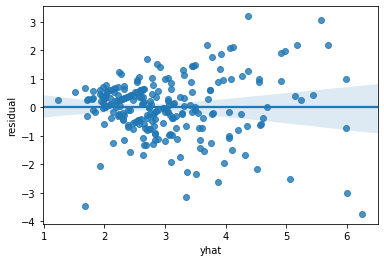

In [40]:
sns.regplot(x="yhat", y="residual", data=df)

## 4. Calculate the sum of squares error *(SSE)*, explained sum of squares *(ESS)*, total sum of squares error *(TSS)*, and root mean squared error *(RMSE)* for your model.

In [42]:
# Calculate SSE

SSE = mean_squared_error(df.y, df.yhat) * len(df)

# Calculate ESS

ESS = sum((df.yhat - df.y.mean())**2)

# Calculate TSS

TSS = ESS + SSE

# Calculate MSE

MSE = mean_squared_error(df.y, df.yhat)

# Calculate RMSE

RMSE = sqrt(mean_squared_error(df.y, df.yhat))

print(f'SSE: {SSE}')
print(f'ESS: {ESS}')
print(f'TSS: {TSS}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

SSE: 252.788743850776
ESS: 212.4237331984042
TSS: 465.21247704918017
MSE: 1.036019442011377
RMSE: 1.0178504025697377


## 5. Calculate the sum of squares error *(SSE)*, mean squared error *(MSE)*, and root mean squared error *(RMSE)* for the baseline model. (I.E. a model that always predicts the average tip amount.)

In [43]:
# Calculate SSE

SSE_baseline = mean_squared_error(df.y, df.yhat_baseline) * len(df)

# Calculate MSE

MSE_baseline = mean_squared_error(df.y, df.yhat_baseline)

# Calculate RMSE

RMSE_baseline = sqrt(mean_squared_error(df.y, df.yhat_baseline))

print(f'SSE: {SSE_baseline}')
print(f'MSE: {MSE_baseline}')
print(f'RMSE: {RMSE_baseline}')

SSE: 465.2124770491804
MSE: 1.906608512496641
RMSE: 1.3807999538298954


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared erros from the baseline model and outputs whether or not your mondel performs better than the baseline model.     

In [44]:
if SSE < SSE_baseline:
    print('The model performs better than the established baseline model.')
else:
    print('The model does not perform better than the established baseline model.')

The model performs better than the established baseline model.


## 7. What is the amount of variance explained in your model?

The variance is equal to $R^2$, and it explains the variance between the relationship.

In [46]:
evs = explained_variance_score(df.y, df.yhat)
print("Explained Variance = ", round(evs,3))

Explained Variance =  0.457


In [47]:
model.rsquared

0.45661658635167646

## 8. Is your model significantly better than the baseline model?

In [49]:
print(f'Because our p-value of {(round(model.f_pvalue, 33))} is smaller than our alpha, we can say that the model is significantly better than the baseline model.')

Because our p-value of 1e-33 is smaller than our alpha, we can say that the model is significantly better than the baseline model.


## 9. Create a file named evaluate.py that contains the following functions.

- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false
- `model_significance(ols_model)`: that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the `rsquared` and `f_pvalue` properties from the ols model)